# Pair Programming Visualización III

En este ejercicio, de nuevo, trabajaremos con el csv que generamos en el ejercicio de pair programming de Pandas V, ese en el que habíamos unido distintos csv en uno.

En estos ejercicios aprenderemos a hacer algunas gráficas usando la librería seaborn. Igual que el ejercicio anterior de pair programming, para solucionar algunas preguntas tendréis que usar métodos y herramientas aprendidas anteriormente como groupby, value_counts, rename, filtrado de datos, etc.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datos/attacks_pandas5.csv")
df.head(2)

,case_number,unnamed:_0_x,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,unnamed:_0_y,fatal_(y/n),injury,date
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,0,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,2018.06.03.a,6,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,6,Y,FATAL,03-Jun-2018


### 1. Usando la librería seaborn, crea una gráfica de barras que muestre el número de personas que han hecho cada actividad en cada año. Hacedlo solo desde el 2015. Os podrá salir una gráfica un poco fea, no os preocupeis, es lo que esperamos.

In [3]:
df_año_2015 = df[df["year"] > 2015]
df_año_2015.head(2)

,case_number,unnamed:_0_x,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,unnamed:_0_y,fatal_(y/n),injury,date
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,0,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,2018.06.03.a,6,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,6,Y,FATAL,03-Jun-2018


In [4]:
df_año_2015_actividad = df_año_2015.groupby(["activity", "year"])["case_number"].count().reset_index()
df_año_2015_actividad.head(2)

,activity,year,case_number
0,Body boarding,2017.0,1
1,Diving,2016.0,1


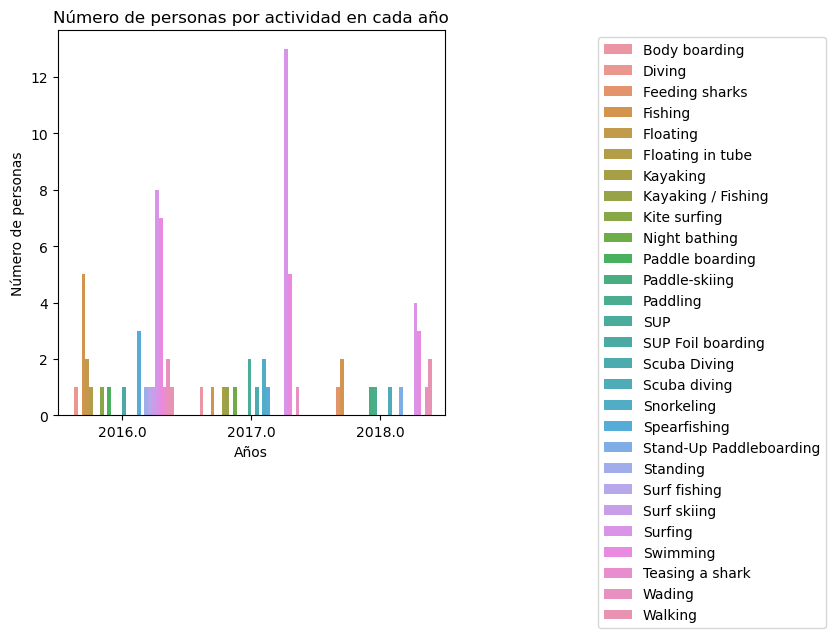

In [13]:
plt.figure(figsize = (5,5))

fig = sns.barplot(y="case_number", x="year", data=df_año_2015_actividad, hue="activity")

fig.set(xlabel = "Años", ylabel = "Número de personas")

fig.set_title("Número de personas por actividad en cada año")

plt.legend(bbox_to_anchor=(2, 1))

plt.show()

### 2. Usando la librería seaborn, crea una gráfica de barras que muestre el número de ataques que han ocurrido cada año en función del sexo. Hacedlo solo desde el 2015.

In [15]:
df_año_2015_ataque = df_año_2015.groupby(["year", "sex_"])["case_number"].count().reset_index()
df_año_2015_ataque

,year,sex_,case_number
0,2016.0,F,7
1,2016.0,M,30
2,2017.0,F,9
3,2017.0,M,21
4,2018.0,F,2
5,2018.0,M,15


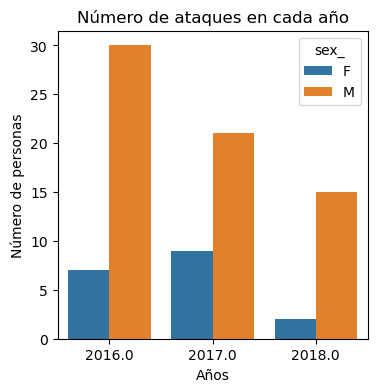

In [18]:
plt.figure(figsize = (4,4))

fig = sns.barplot(x="year", y="case_number", data=df_año_2015_ataque, hue="sex_")

fig.set(xlabel = "Años", ylabel = "Número de personas")

fig.set_title("Número de ataques en cada año")

plt.show()

### 3. ¿Cuántos ataques hubo por año? Seleccionad solo desde el año 1500.

In [27]:
df_año_1500 = df[df["year"] > 1500]
df_año_1500.head(2)

,case_number,unnamed:_0_x,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,unnamed:_0_y,fatal_(y/n),injury,date
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,0,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
1,2018.06.03.a,6,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,6,Y,FATAL,03-Jun-2018


In [28]:
df_año_1500g = df_año_1500.groupby("year")["case_number"].count().reset_index()
df_año_1500g

,year,case_number
0,1543.0,1
1,1554.0,1
2,1555.0,1
3,1580.0,1
4,1595.0,1
...,...,...
138,2014.0,35
139,2015.0,68
140,2016.0,37
141,2017.0,30


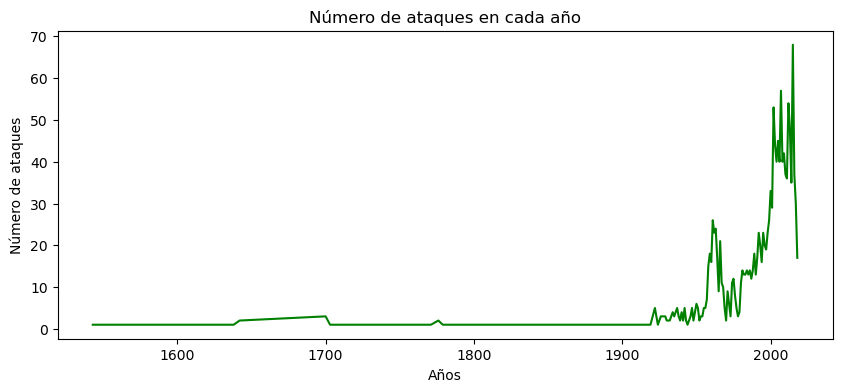

In [29]:
plt.figure(figsize = (10,4))

fig = sns.lineplot(data = df_año_1500g, x = "year", y = "case_number", color = "green")

fig.set(xlabel = "Años", ylabel = "Número de ataques")

fig.set_title("Número de ataques en cada año")

plt.show()

### 4. Seleccionad solo los registros de USA, AUSTRALIA y SOUTH AFRICA. Muestra el número de ataques por país y año desde el año 1900.

In [38]:
df_paises = df[((df["country"] == "USA") | (df["country"] == "AUSTRALIA") | (df["country"] == "SOUTH AFRICA")) & (df["year"] > 1900)]
df_paises.head()

,case_number,unnamed:_0_x,year,type,country,area,location,activity,name,sex_,age,time,species_,href,siglo,unnamed:_0_y,fatal_(y/n),injury,date
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,0,N,"No injury to occupant, outrigger canoe and pad...",25-Jun-2018
2,2018.05.26.b,8,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,Cody High,M,15,17h00,"Bull shark, 6'",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,8,N,Lower left leg bitten,26-May-2018
3,2018.05.24,10,2018.0,Provoked,AUSTRALIA,Queensland,Cairns Aquarium,Feeding sharks,male,M,32,Morning,Grey reef shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,10,N,Minor bite to hand by captive shark. PROVOKED ...,24-May-2018
6,2018.04.25.a,21,2018.0,Unprovoked,AUSTRALIA,Western Australia,"Surfers Point, Prevelly",Surfing,Rob Bruce,M,60,09h30,3 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,21,N,"No injury, knocked off board by shark",25-Apr-2018
8,2018.04.22,24,2018.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Robberg Beach, Plettenberg Bay",Paddle-skiing,male,M,33,09h40,"White shark, 2.5 m",http://sharkattackfile.net/spreadsheets/pdf_di...,siglo-XXI,24,N,"No injury, shark bit hole in ski",22-Apr-2018


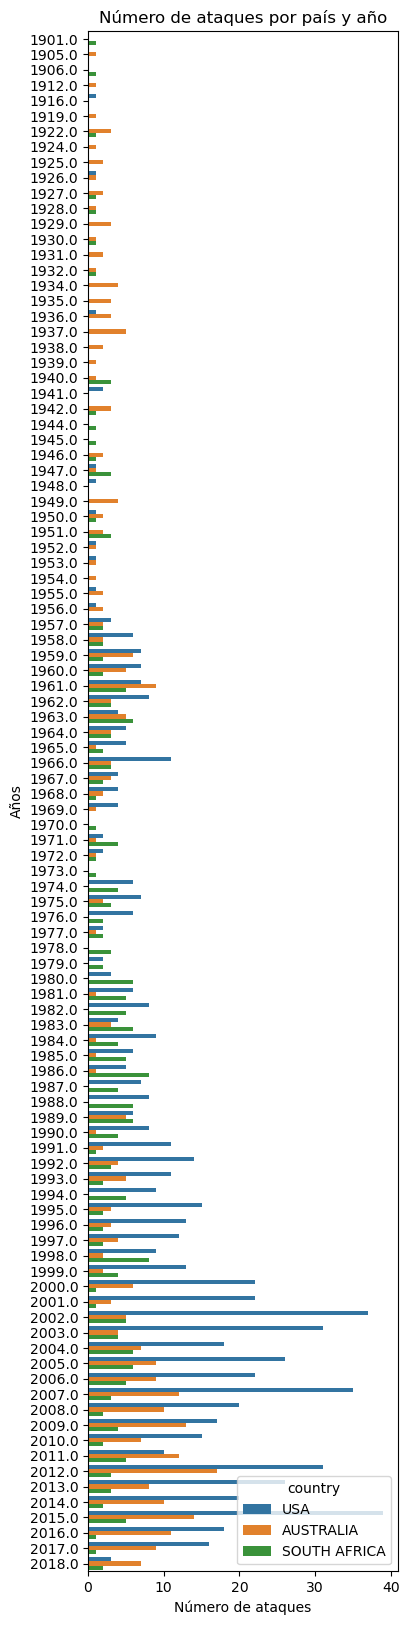

In [41]:
plt.figure(figsize = (4,20))

fig = sns.countplot(data = df_paises, y = "year", hue = "country")

fig.set(ylabel = "Años", xlabel = "Número de ataques")

fig.set_title("Número de ataques por país y año")

plt.show()

### 5. Realizad un boxplot donde se muestre los principales estadísticos del número de ataques por país.

📌 NOTA Somos analistas y no nos vale con sacar las gráficas. Incluid una celda de markdown donde expliqueis que es lo que estamos viendo en las gráficas, es decir, haced una interpretación de los resultados.
Happy coding 🦈